**Processamento Digital de Imagens**

Prática de Amostragem e Quantização

Instruções: 
Utilize python e a biblioteca OpenCV para abertura das imagens. 


Grupo:

* Gustavo Duarte Ventino

* Pedro Araujo Ribeiro

* Gabriel Crepaldi

* Arthur Faria

1)	Utilizando imagem relogio.tif e faça uma reamostragem de seus pixels para 300, 150 e 72 dpi. Sabe-se que a imagem original possui 1250 dpi. Fazer os cálculos por meio do seu algortimo. Não usar o opencv para a conversão

Original Image Size: 3692, 2812


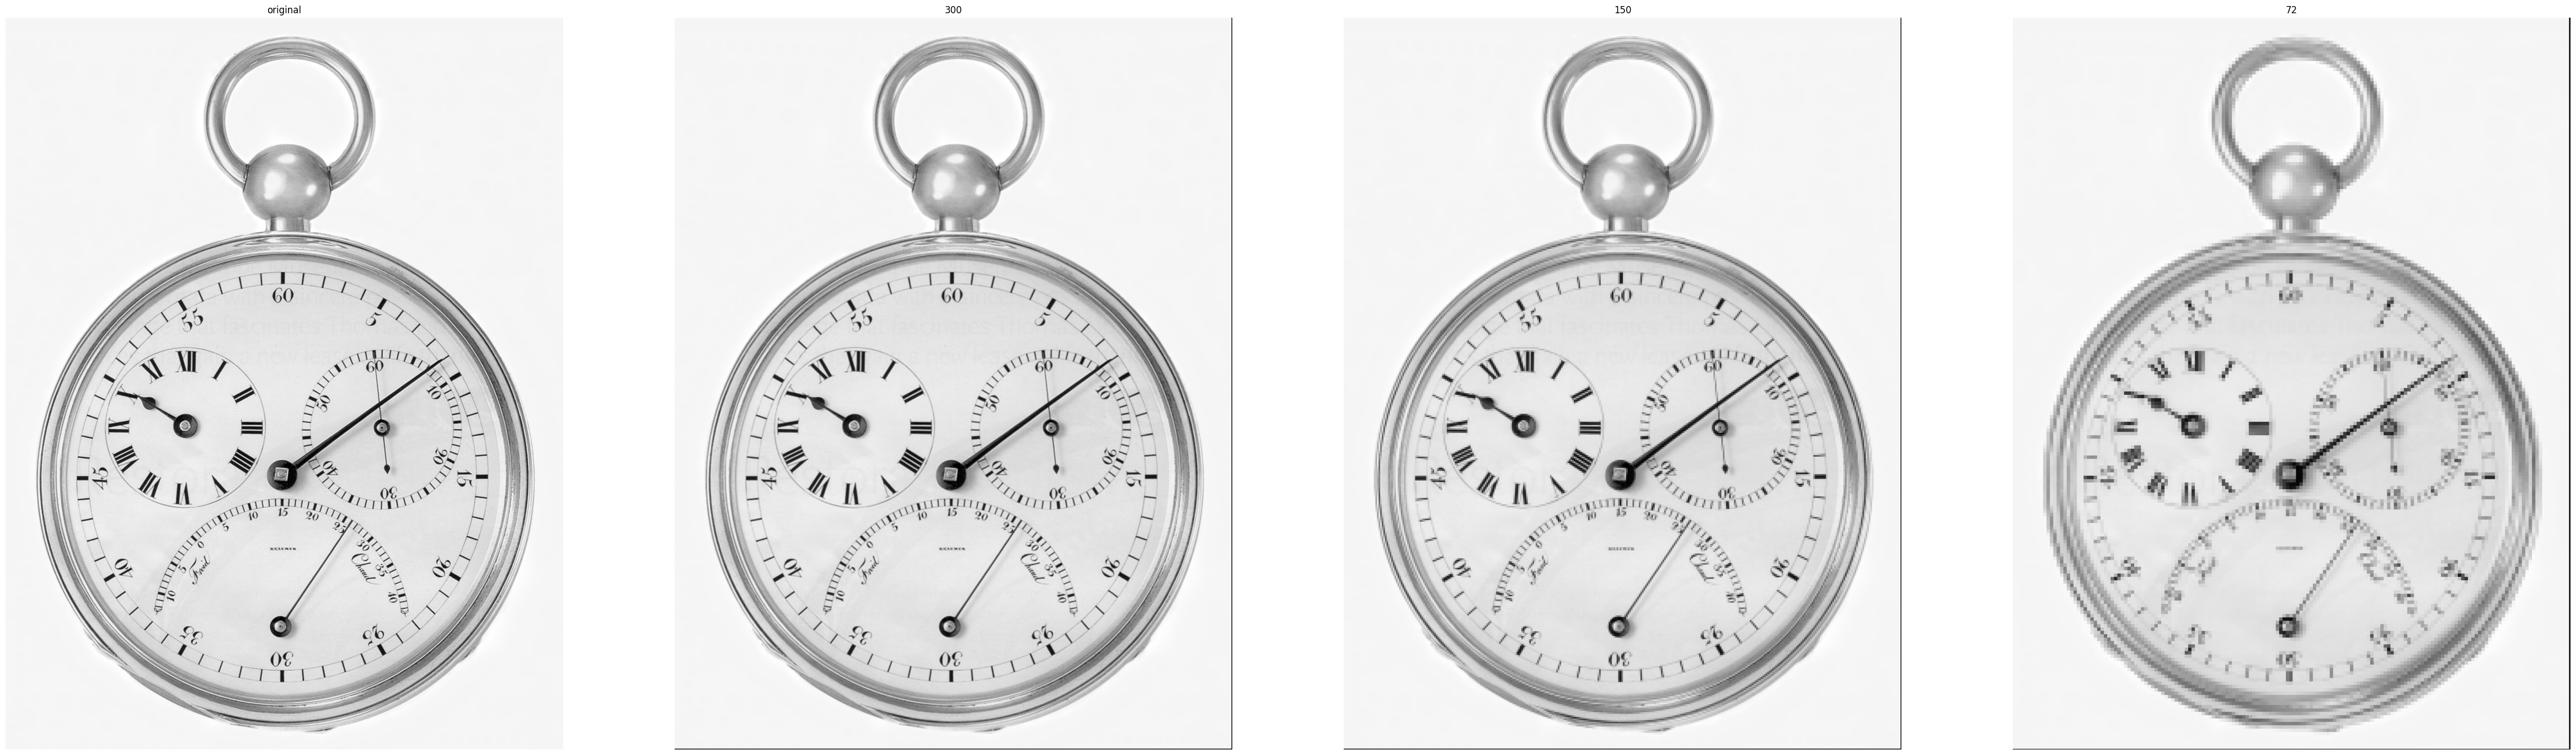

In [51]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

#Prática Crepaldi
clock = cv2.imread("relogio.tif")

rows = clock.shape[0]
columns = clock.shape[1]
print(f"Original Image Size: {rows}, {columns}")

def image_dpi_changer(img, original_dpi=1250, new_dpi=300):
    reduction_factor = original_dpi / new_dpi

    og_rows, og_columns = img.shape[0], img.shape[1]

    new_img = np.zeros_like(img)

    for i in range(0, og_rows - 1, int(reduction_factor)):
        for j in range(0, og_columns - 1, int(reduction_factor)):
            if i + int(reduction_factor) < og_rows and j + int(reduction_factor) < og_columns:
                block = img[i:i+int(reduction_factor), j:j+int(reduction_factor)]
                avg_color = np.mean(block, axis=(0, 1)).astype(np.uint8)

                new_img[i:i+int(reduction_factor), j:j+int(reduction_factor)] = avg_color

    return new_img

new_clock_300 = image_dpi_changer(clock,new_dpi=300)
new_clock_150 = image_dpi_changer(clock,new_dpi=150)
new_clock_72 = image_dpi_changer(clock,new_dpi=72)

labels = ["original", "300", "150", "72"]
images = [clock, new_clock_300, new_clock_150, new_clock_72]

plt.figure(figsize=(60,20))
plt.subplot(1,4,1)
for i in range(0, len(labels)):
    plt.subplot(1,4,i +1)
    plt.title(labels[i])
    plt.axis("off")
    plt.imshow(images[i])

plt.show()

2)	Utilizando a imagem ctskull-256.tif, refaça a quantização de seus pixels utilizando de 7 a 1 bit(s) por pixel.  Fazer os cálculos por meio do seu algortimo. Não usar o opencv para a conversão

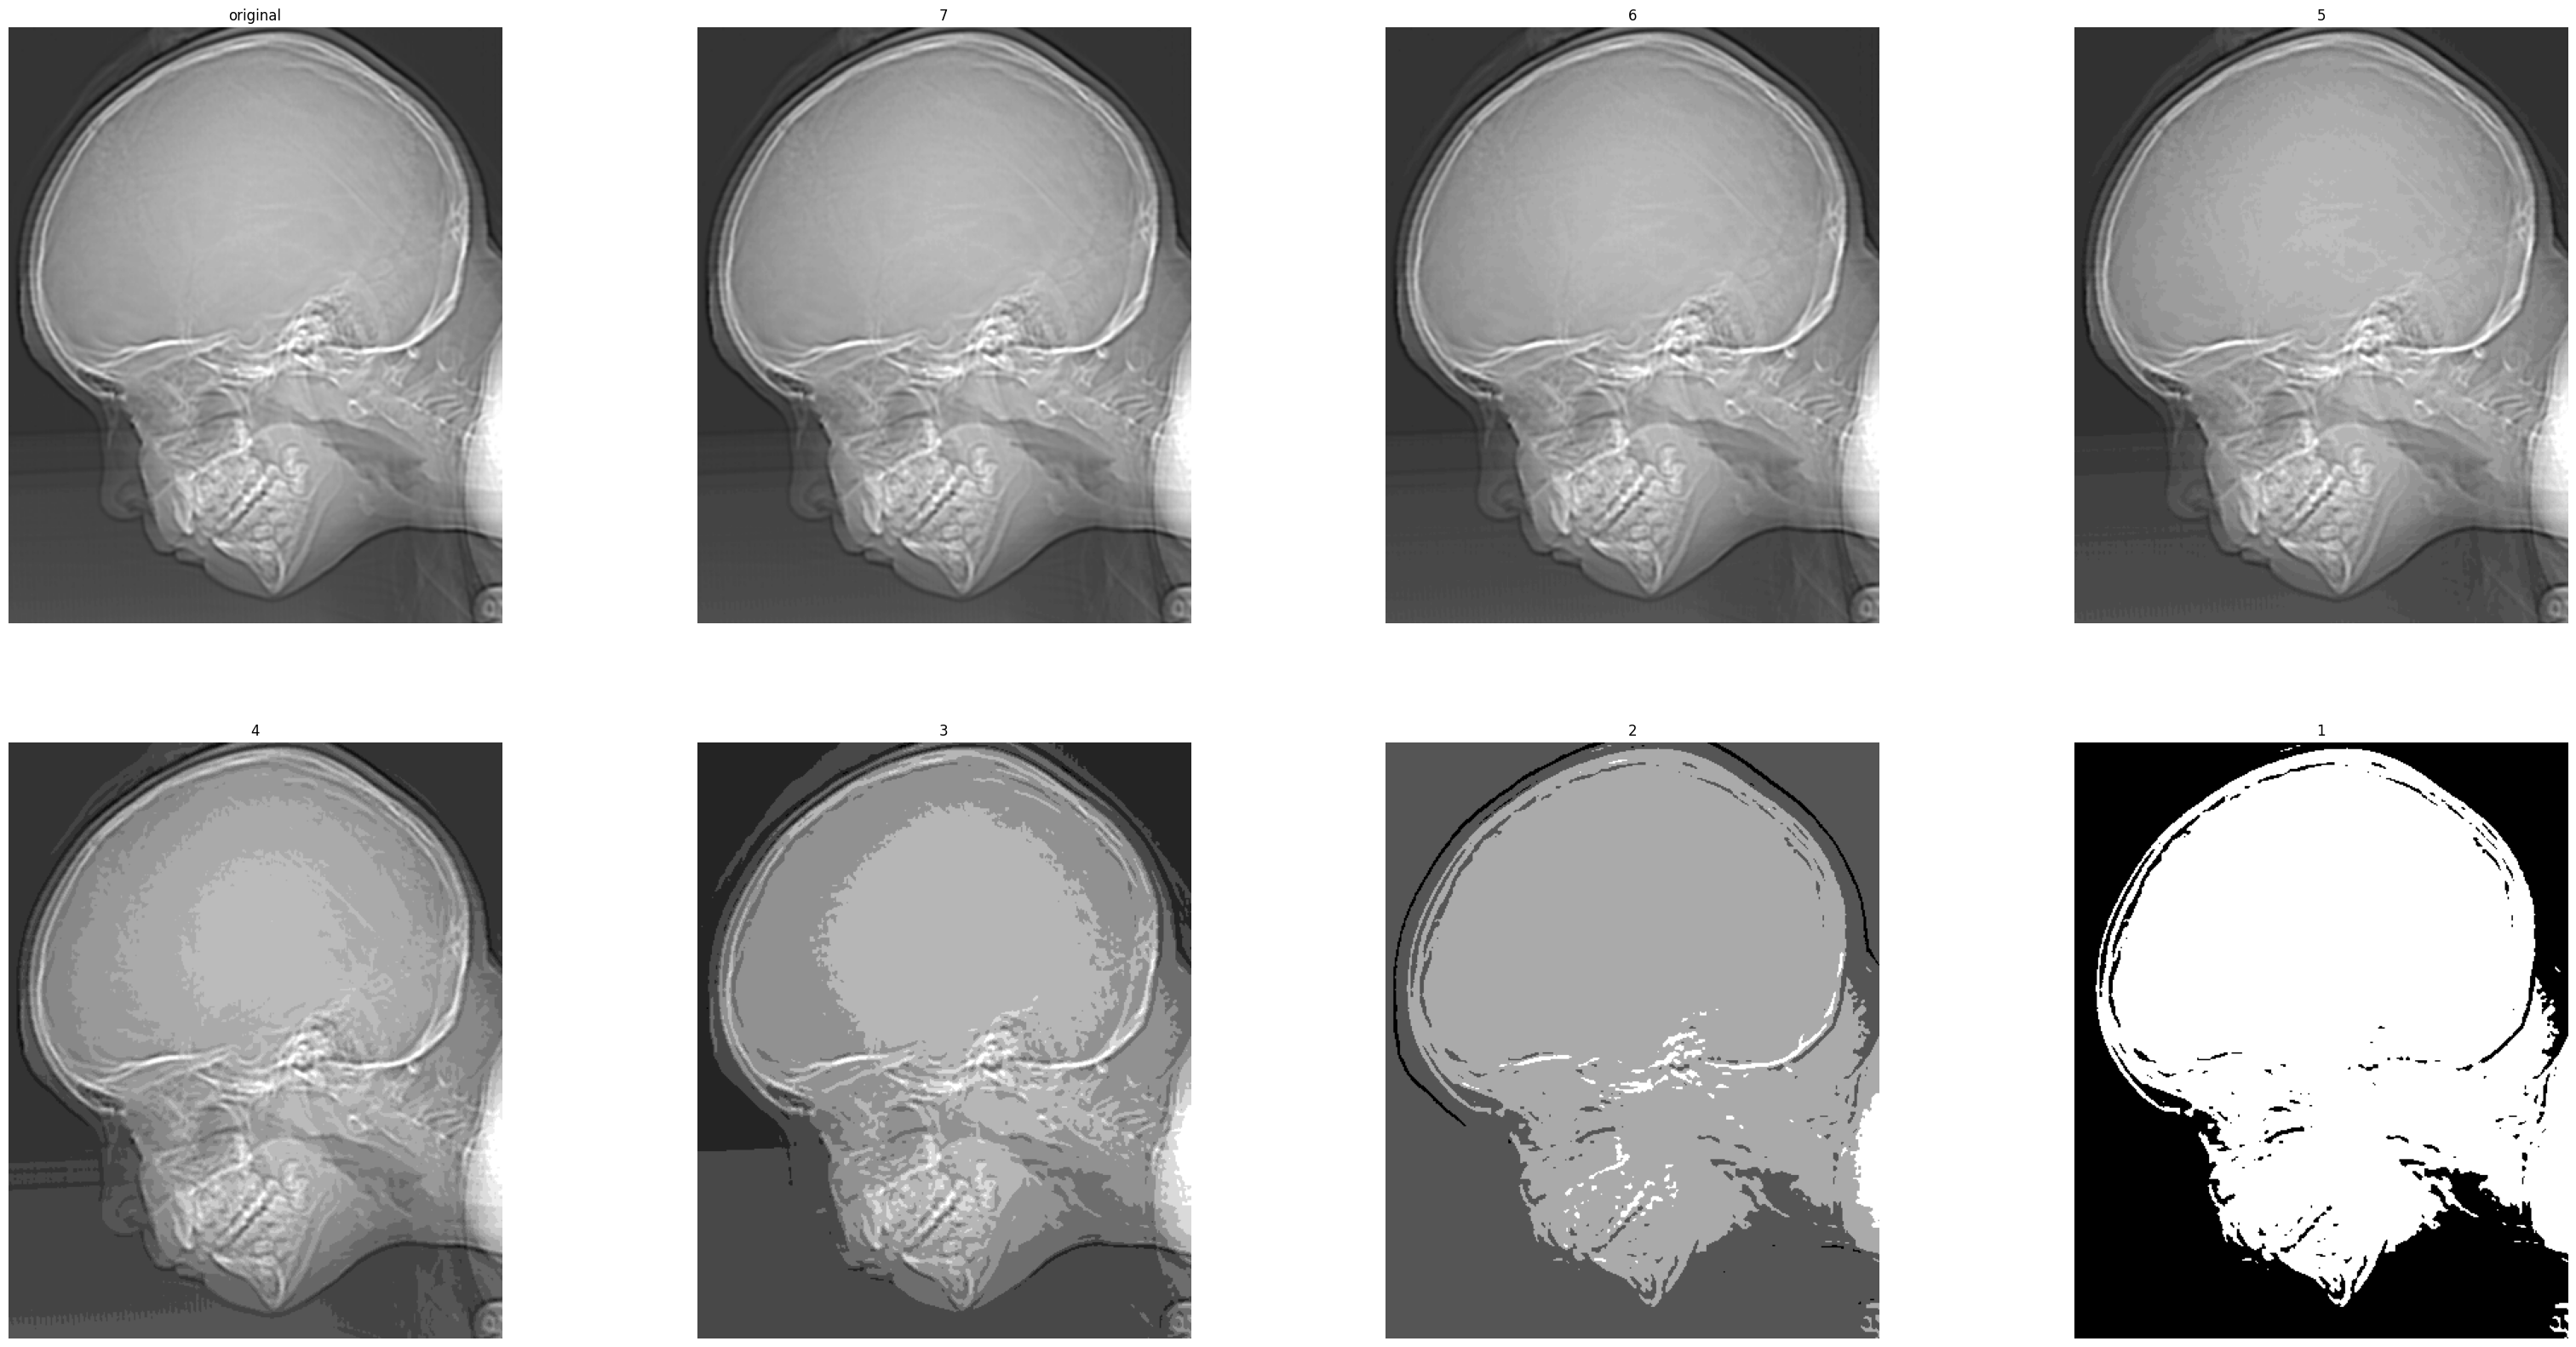

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def image_bit_changer(img, new_bit_size):
    max_intensity_new_bit = 2**new_bit_size - 1
    
    img_normalized = img / 255.0 #(everything will be between 0 and 1)
    img_quantized = np.round(img_normalized * max_intensity_new_bit)
    img_rescaled = (img_quantized / max_intensity_new_bit) * 255.0 # making values go back from 0 to 255
    new_img = img_rescaled.astype(np.uint8) # back to uint8
    
    return new_img

skull = cv2.imread("ctskull-256.tif")

requantizations = [8,7,6,5,4,3,2,1]
labels = ["original","7","6","5","4","3","2","1"]

plt.figure(figsize=(40,20))
plt.subplot(2,4,1)
for i in range(0, len(requantizations)):
    plt.subplot(2,4,i +1)
    plt.title(labels[i])
    plt.axis("off")
    plt.imshow(image_bit_changer(skull, requantizations[i]))


plt.show()
